## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [7]:
# answer goes here
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv')
data.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,...,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,3,2,3,2,3,2,4,44,3,3,4,3,3,3,4,4,3,4,5,4,3,1,5,4,4,3,4,4,2,4,...,62,-2,-2,4,-1,0,0,0,0,8,0,0,0,0,0,0,0,1,0,1,0,5,8,1,4,1,1,1,7,3,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,3,3,4,2,2,2,3,43,3,3,3,3,4,3,2,4,3,2,5,4,3,0,3,2,2,1,4,4,1,4,...,-2,66,90,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,2,1,1,2,6,3,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,5,3,3,1,4,4,4,4,3,3,3,3,...,-2,68,78,3,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,3,2,1,3,6,3,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,-1,-1,-1,-1,3,3,3,3,4,4,2,4,...,-2,-1,-1,-1,-1,0,0,0,0,99,0,0,0,0,0,0,0,0,1,-2,-1,-1,3,3,2,1,1,1,8,3,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,4,3,3,1,3,3,3,3,3,3,3,3,...,-2,65,75,2,1,0,0,0,0,2,0,1,0,1,0,0,0,0,0,-2,0,5,2,4,2,3,1,5,7,1,1,2,4,0,0,1,0,4,1,4.260668


As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [9]:
# answer goes here
score_data = data.loc[:, data.columns.str.endswith('score')]

,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [12]:
# answer goes here
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(score_data), columns=score_data.columns)

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

In [22]:
# answer goes here
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

k = range(2, 30)

for i in k:
  km = KMeans(n_clusters=i)
  km.fit(X_scaled)

  inertias.append(km.inertia_)

  mapping1[k] = sum(np.min(cdist(X_scaled, km.cluster_centers_,
                                 'euclidean'), axis=1)) / X_scaled.shape[0]
  mapping2[k] = km.inertia_ 

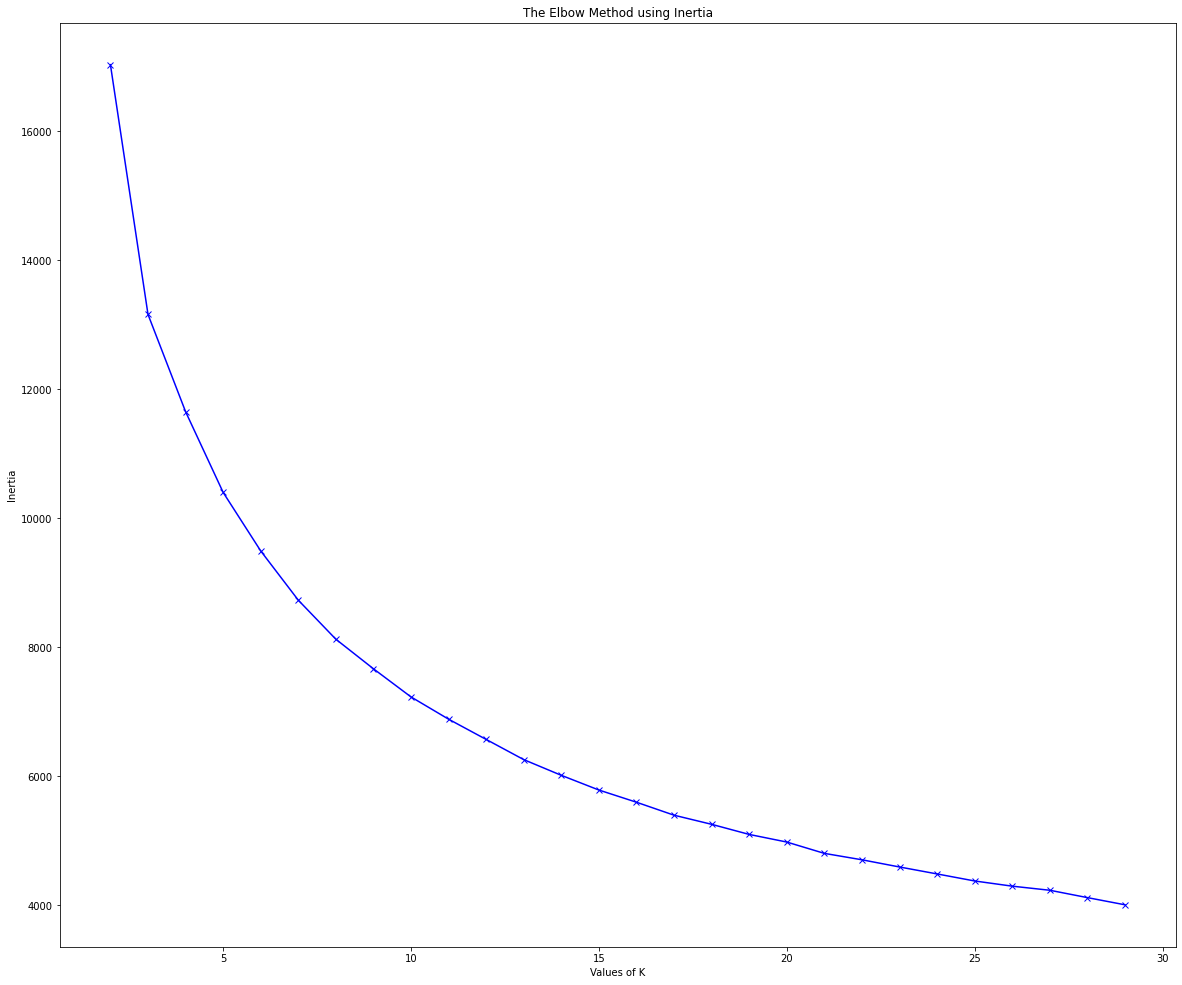

In [36]:
plt.figure(figsize=(20,17))
plt.plot(k, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426
For n_clusters = 7 The average silhouette_score is : 0.3728615111052894
For n_clusters = 8 The average silhouette_score is : 0.32799178719839805
For n_clusters = 9 The average silhouette_score is : 0.3322227124919707
For n_clusters = 10 The average silhouette_score is : 0.3386172527066813
For n_clusters = 11 The average silhouette_score is : 0.34569272027182674
For n_clusters = 12 The average silhouette_score is : 0.3378096310449557
For n_clusters = 13 The average silhouette_score is : 0.337227299460776
For n_clusters = 14 The average silhouette_score is : 0.349473567

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 22 The average silhouette_score is : 0.3424551049830967


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 23 The average silhouette_score is : 0.34540199252687226


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 24 The average silhouette_score is : 0.3403066932366269


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 25 The average silhouette_score is : 0.3277779792185301


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 26 The average silhouette_score is : 0.3336289836872208


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 27 The average silhouette_score is : 0.33649469147560523


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 28 The average silhouette_score is : 0.34312695203257454


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 29 The average silhouette_score is : 0.3381092484215105


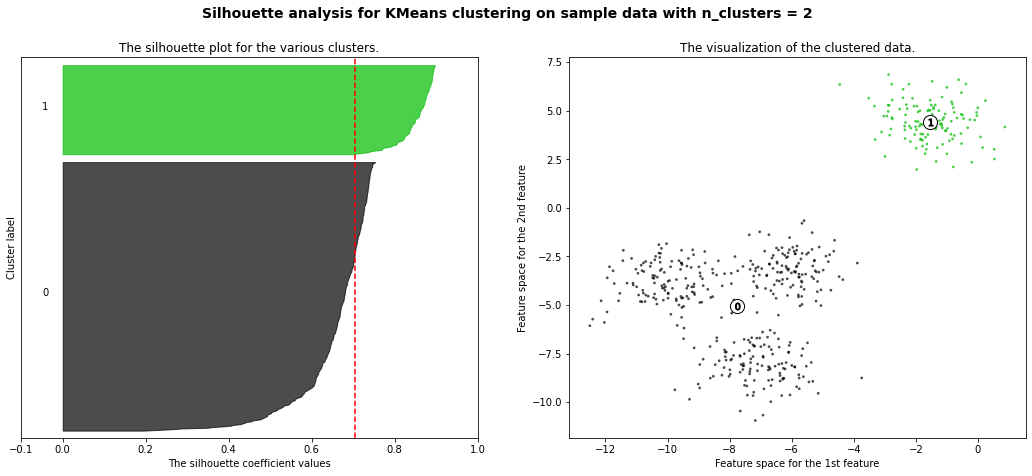

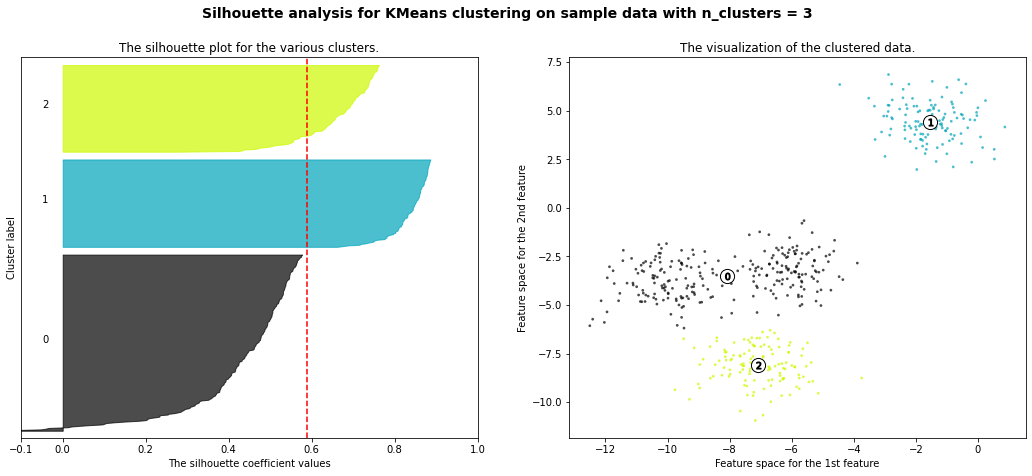

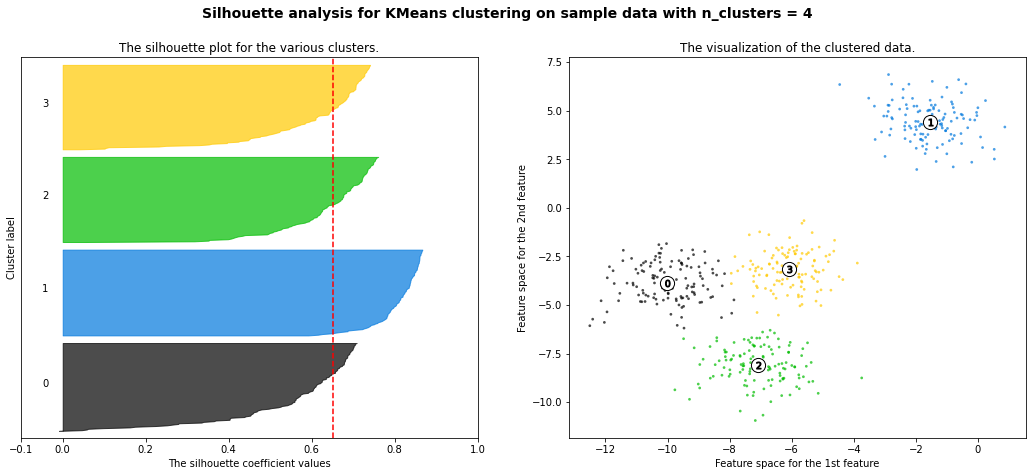

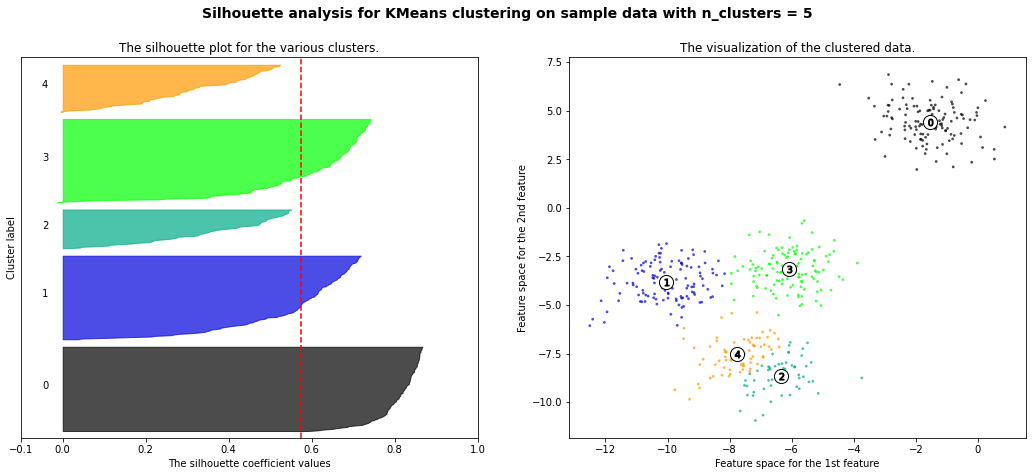

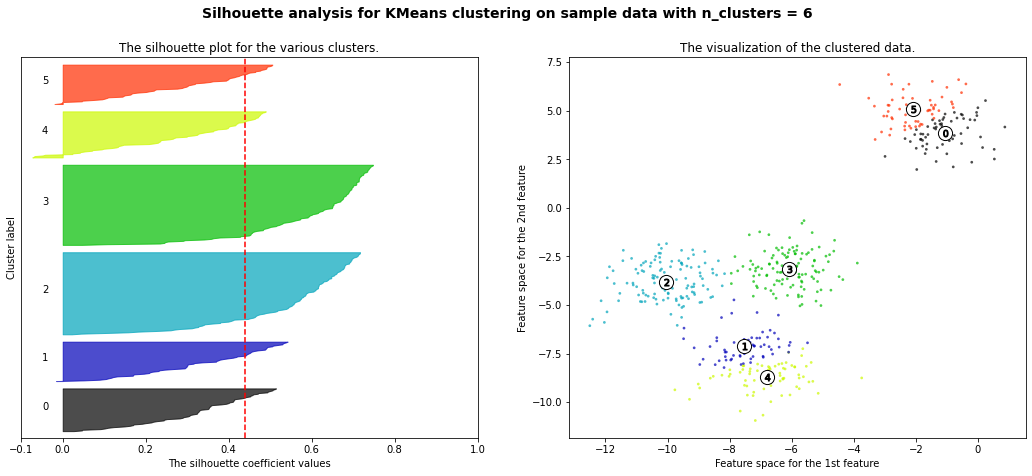

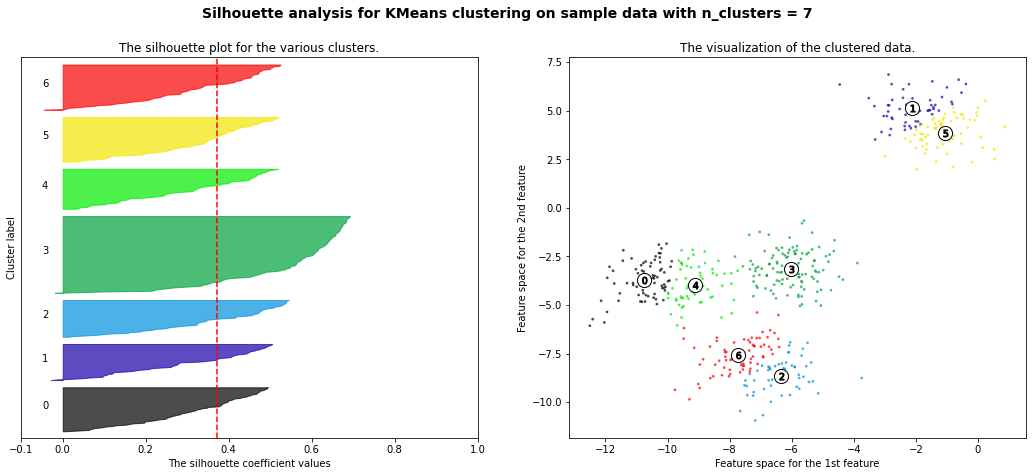

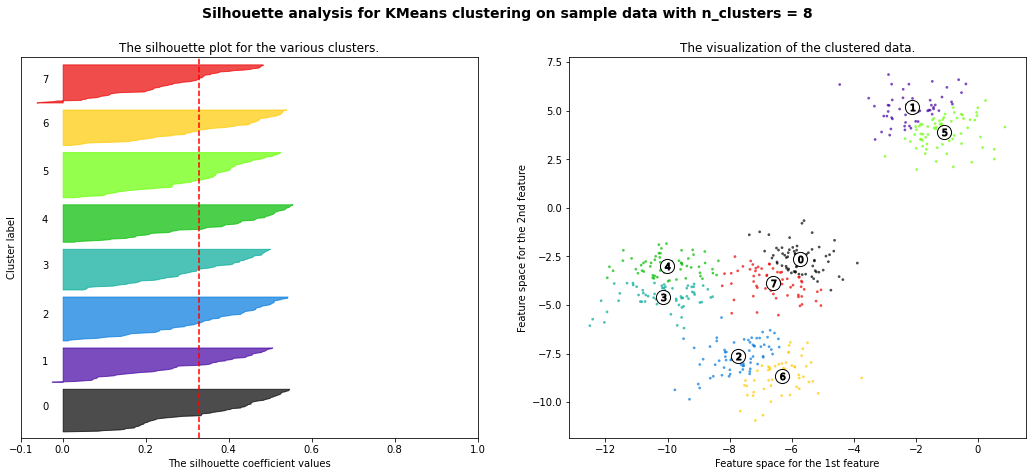

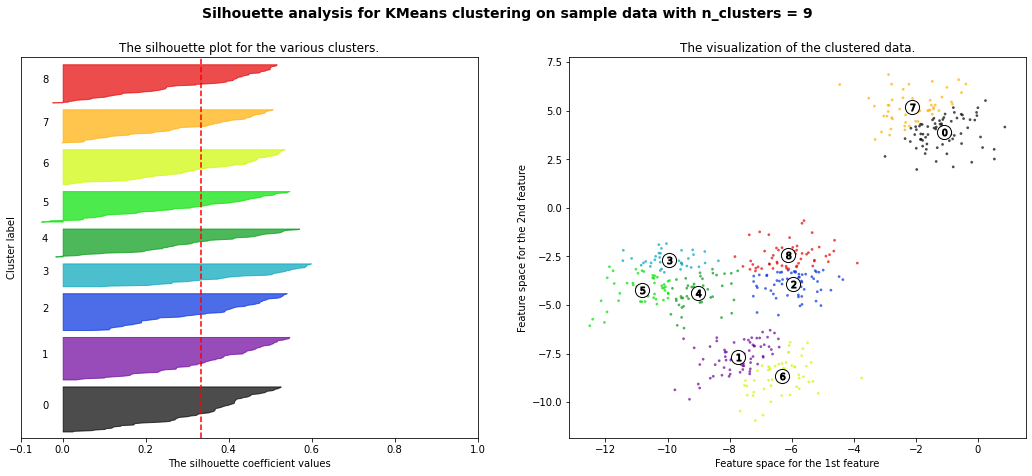

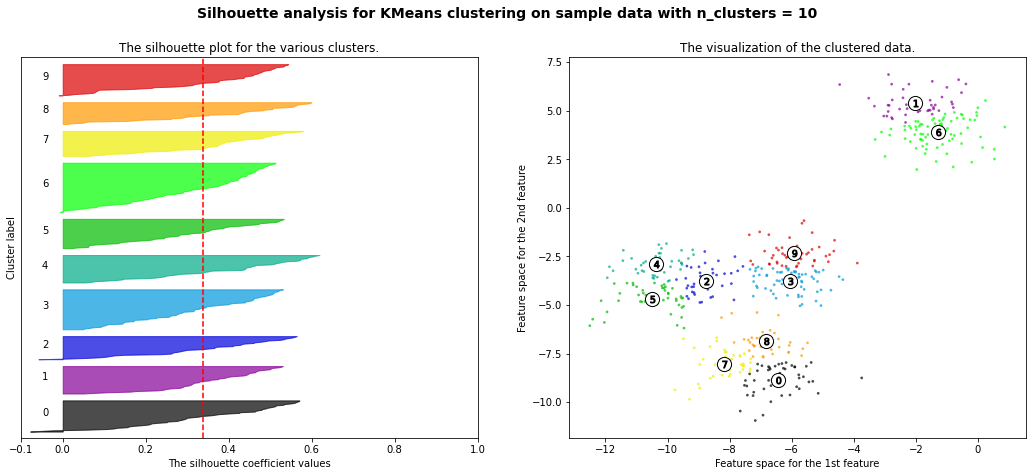

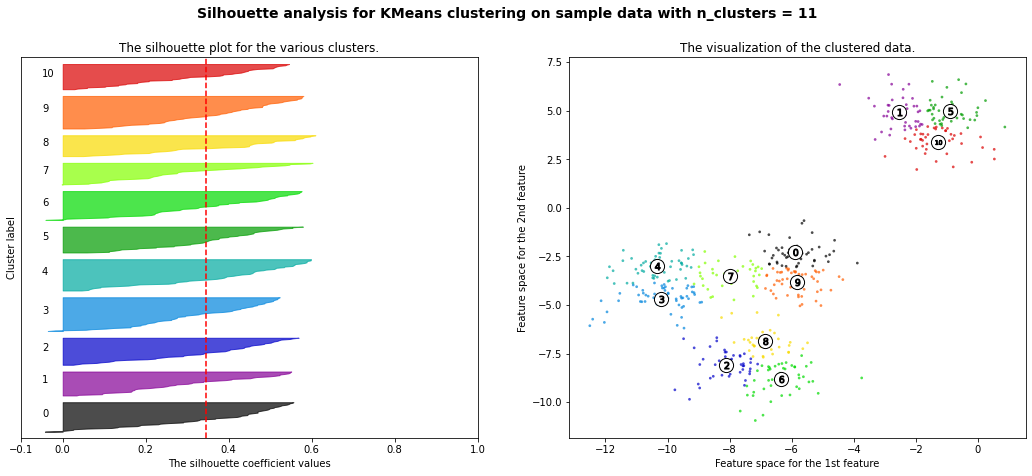

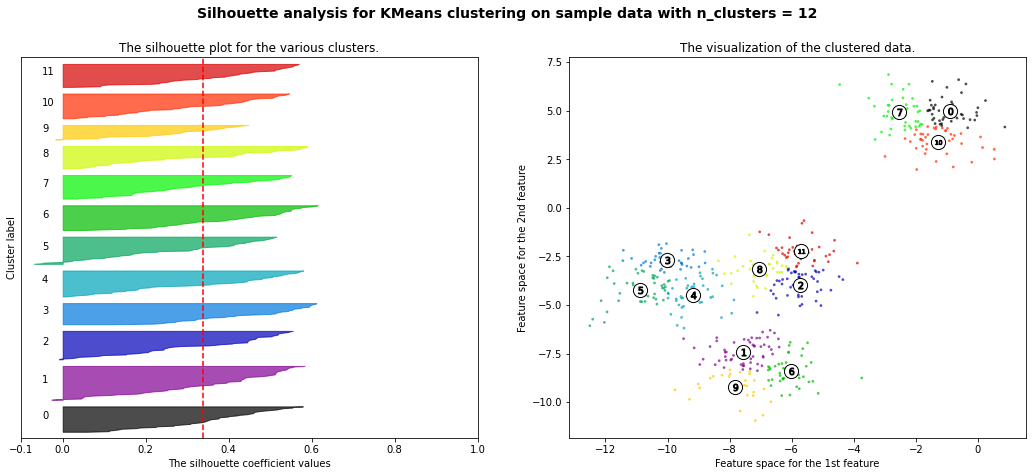

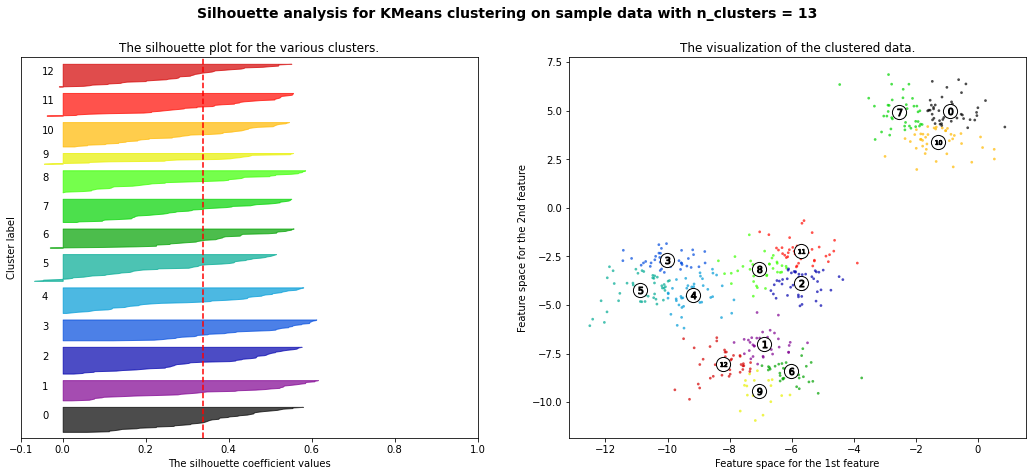

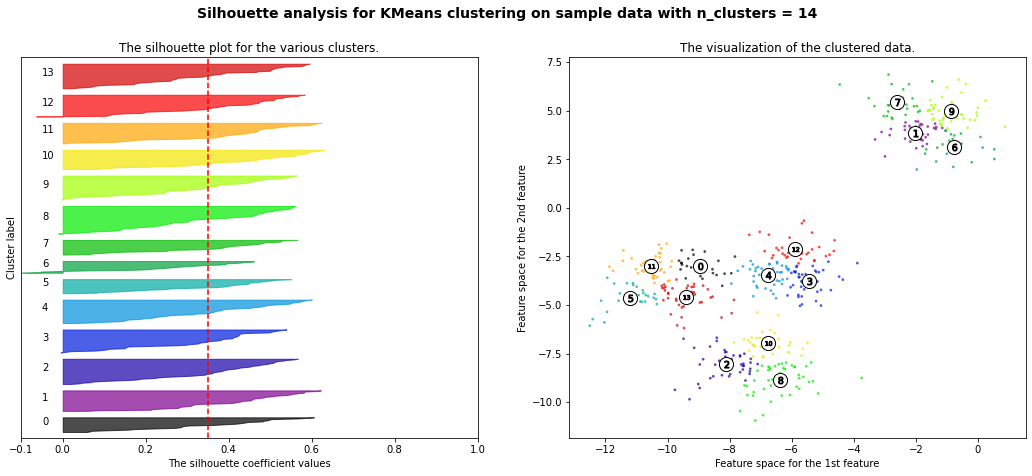

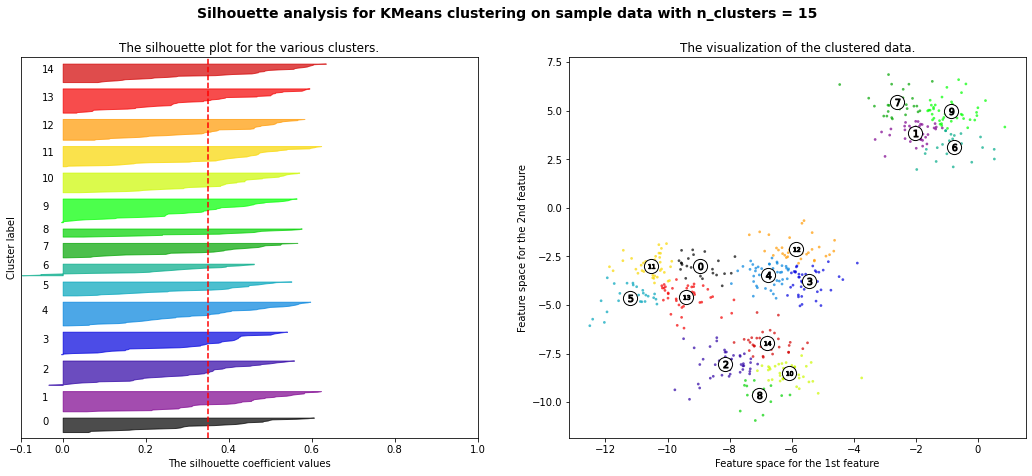

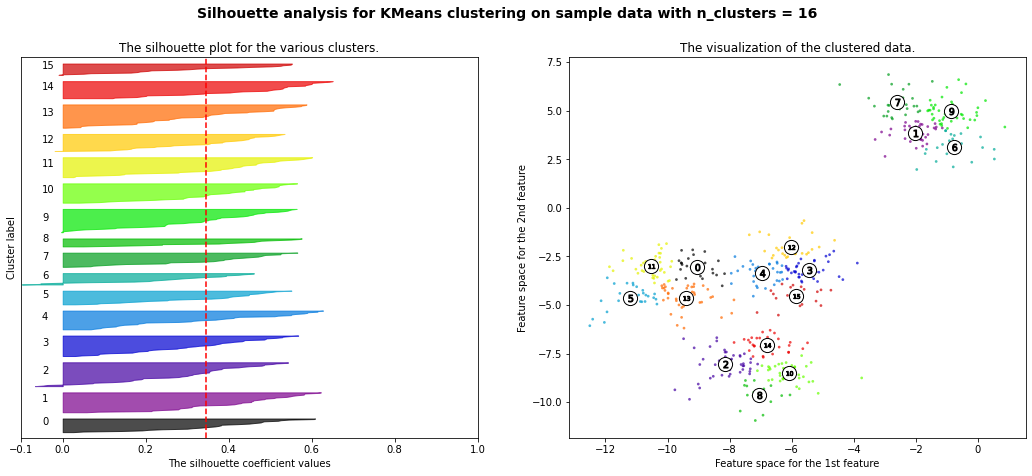

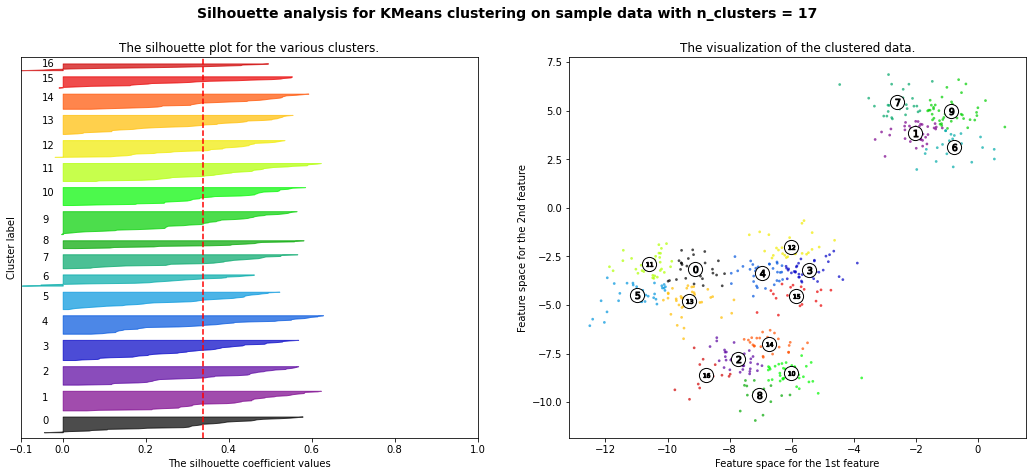

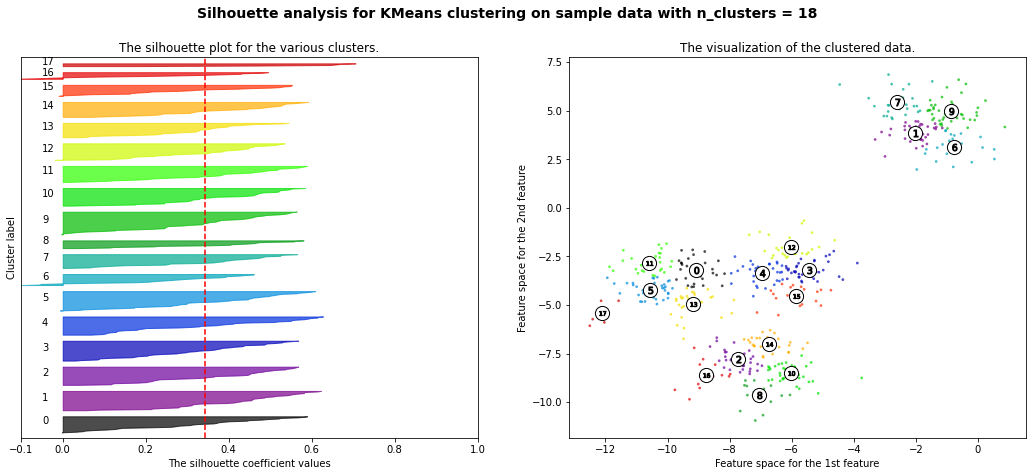

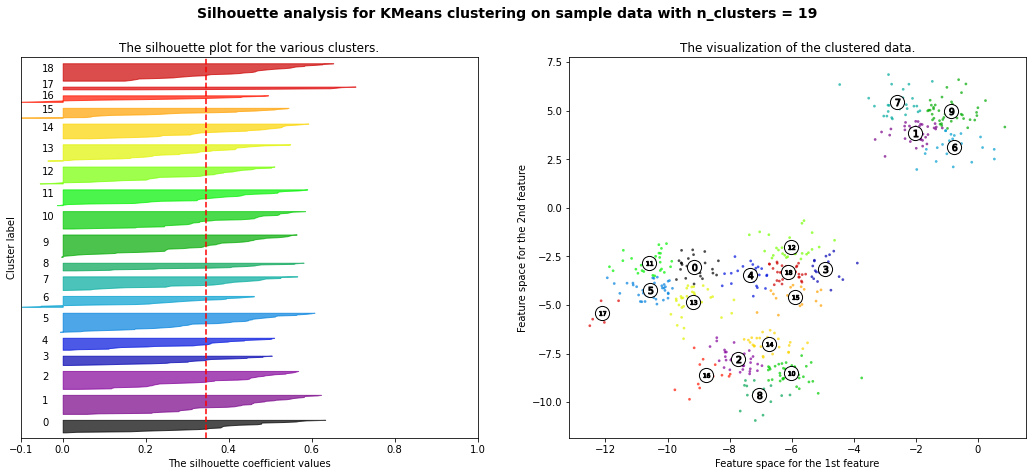

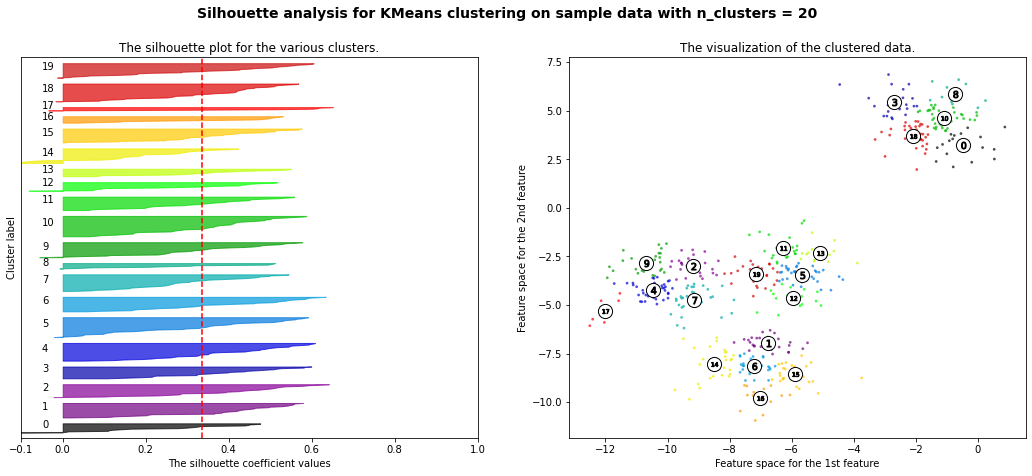

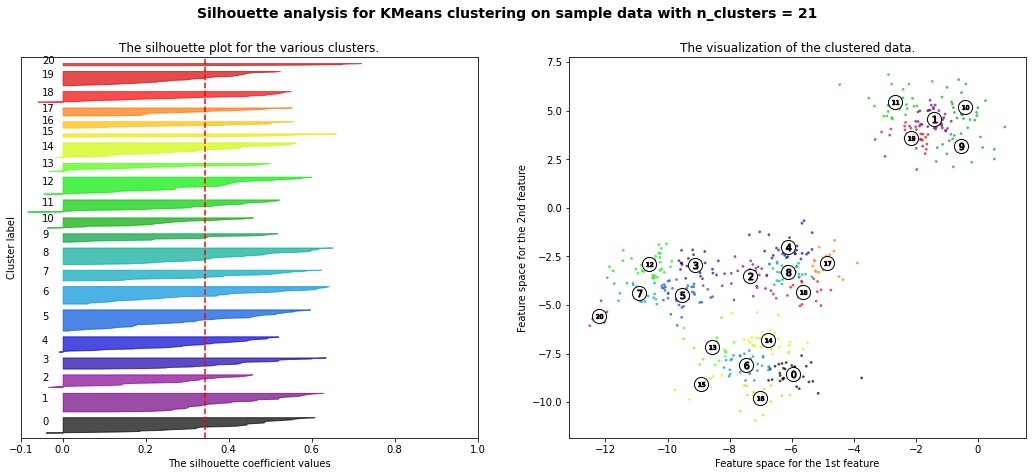

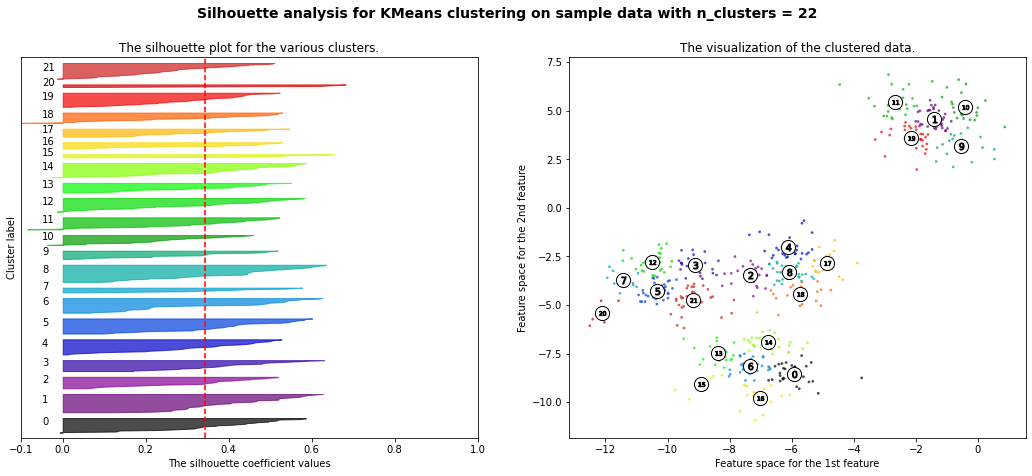

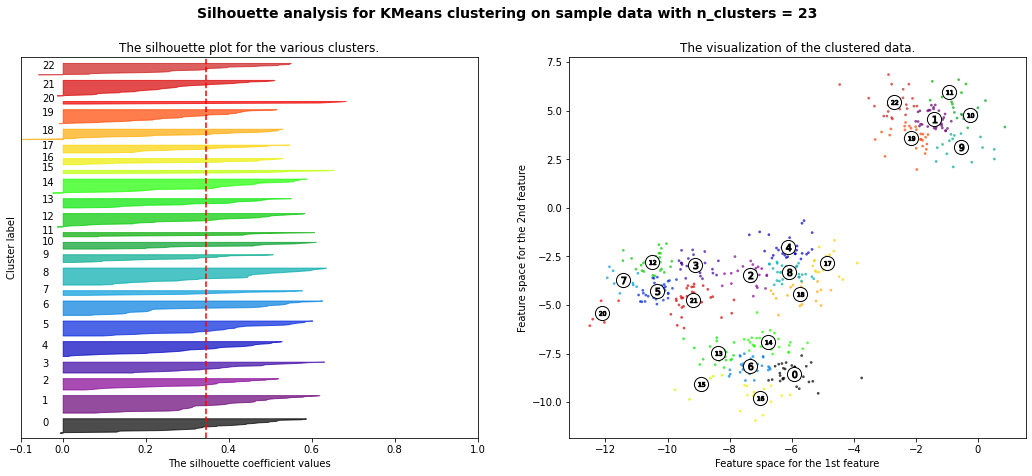

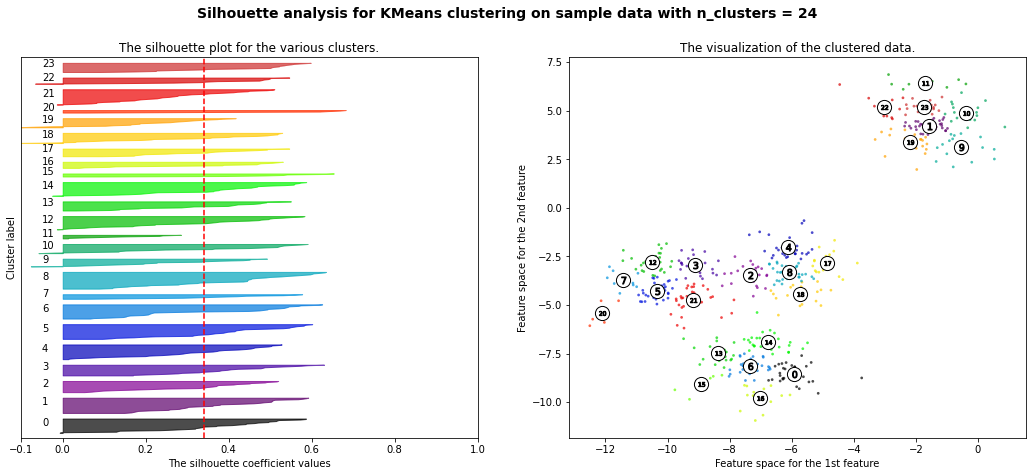

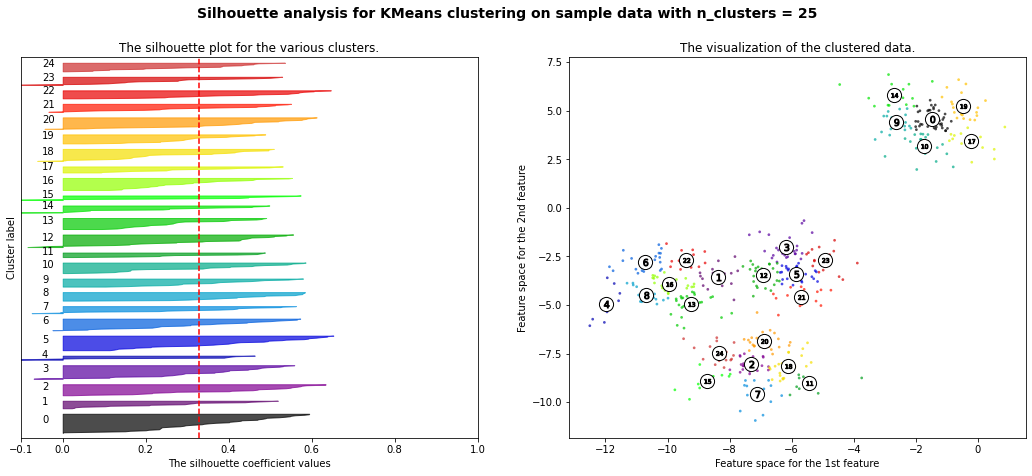

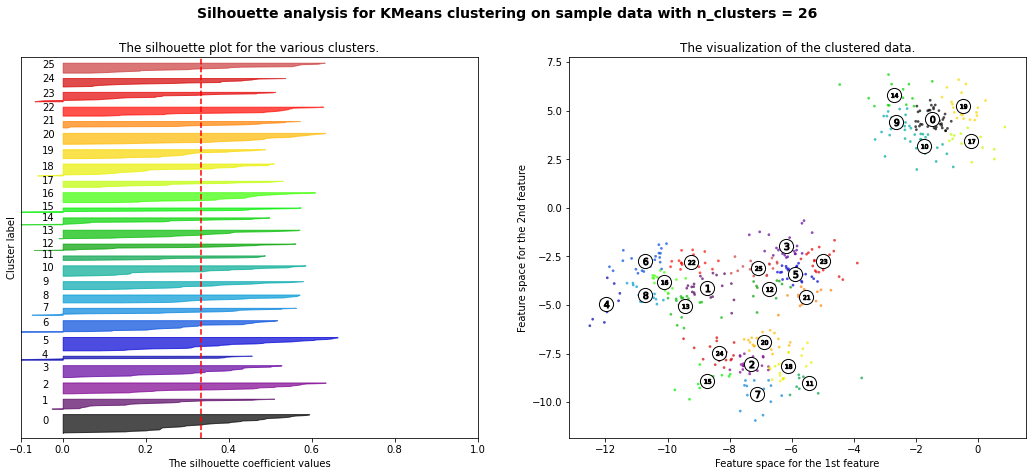

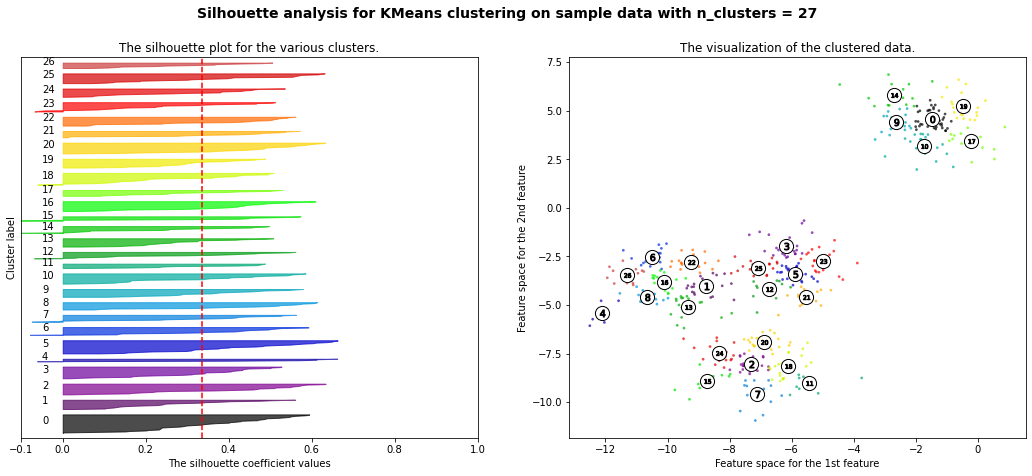

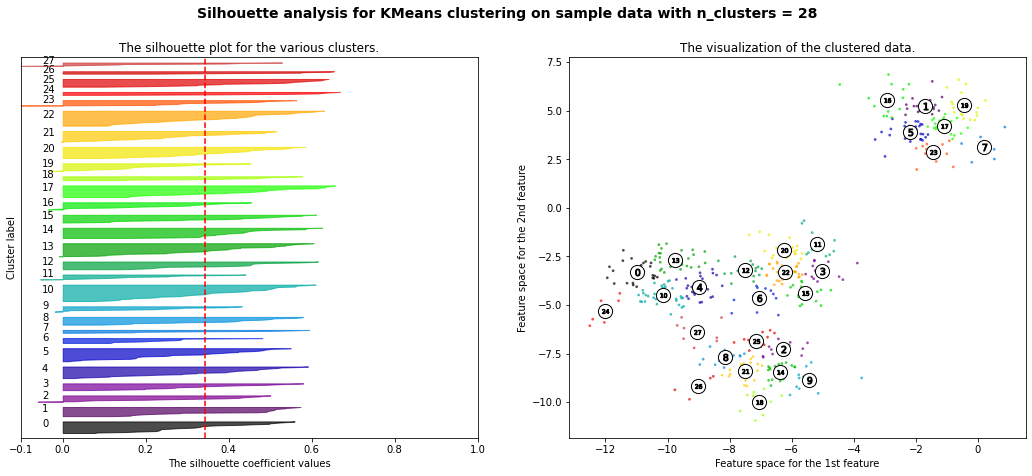

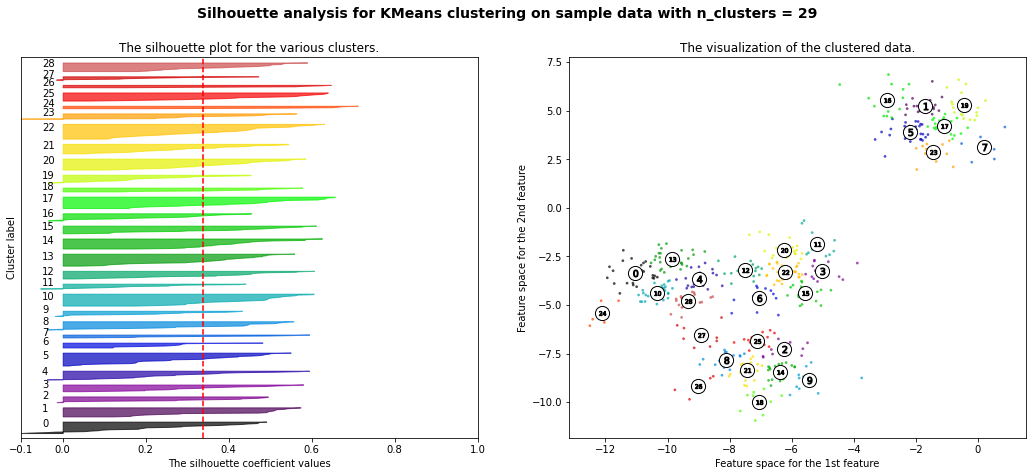

In [37]:
# answer goes here
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = range(2, 30)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()




Ultimately, this will come down to business need and practical use-cases for the number of clusters. There isn't a drastic enough dropoff for SSE by n_clusters to determine a threshold.

Regarding silhouette scores, n_clusters = [2, 4, 7, 8-30] seem to all be optimal. However, we would have to consider the business application. Is it practical to break up our data into 30 clusters?

I am inclined to side with n_clusters = 4, based on visualization, evaluation metrics and practicality.